In [3]:
pip install pandas numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.9 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 8.8 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 56.3 MB/s eta 0:00:001m45.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 58.3 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 59.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 39.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 59.8 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86

In [6]:
pip install tensorflow

  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached wrapt-1.17.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 13.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 25.0 MB/s eta 0:00:00
Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 55.6 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 58.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5

In [9]:
pip install tensorflow_decision_forests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.3 MB/s eta 0:00:009.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Ingestion

## Load dataset training
### Memory optimization when loading the dataset

Since the dataset is very large, memory usage will be optimized when reading it with Pandas. By default, Pandas allocates data types like `int64`, `float64` or `object`, which can be unnecessarily heavy.

To reduce memory consumption:

- Numeric columns are **downcasted** to smaller types such as `int32`, `int8` or `float32`, whenever the range of values allows it.
- Categorical columns that Pandas would detect as `object` are forced to `category`, significantly reducing their size.

To apply this optimization, a **type dictionary (`dtype`)** will be used when reading the CSV with `pandas.read_csv`, specifying the type of each column.


In [122]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}

dataset_df = pd.read_csv('train.csv', dtype=dtypes)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (26296946, 20)


## Load Labels
Load `train_labels.csv`, which contains for each session an indicator of whether the user answered each question correctly.  
These values constitute the **target variable** (or **labels/targets**) that the model must predict.


In [94]:
labels = pd.read_csv('train_labels.csv')
labels.head(5)

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


The session id column contains both the session id and the question, marked by a q and the number. Let's split this column in two and add them to the dataframe.

In [95]:
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]) )
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

In [96]:
labels.head(5)

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


## Display answers to each question

First, the number of correct and incorrect answers will be plotted.

<Axes: xlabel='correct'>

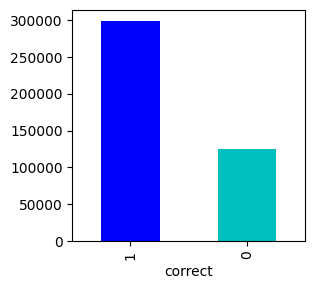

In [19]:
plt.figure(figsize=(3, 3))
plot_df = labels.correct.value_counts()
plot_df.plot(kind="bar", color=['b', 'c'])

Subsequently, a graph will be made for each question, showing how many people answered correctly and how many did not.

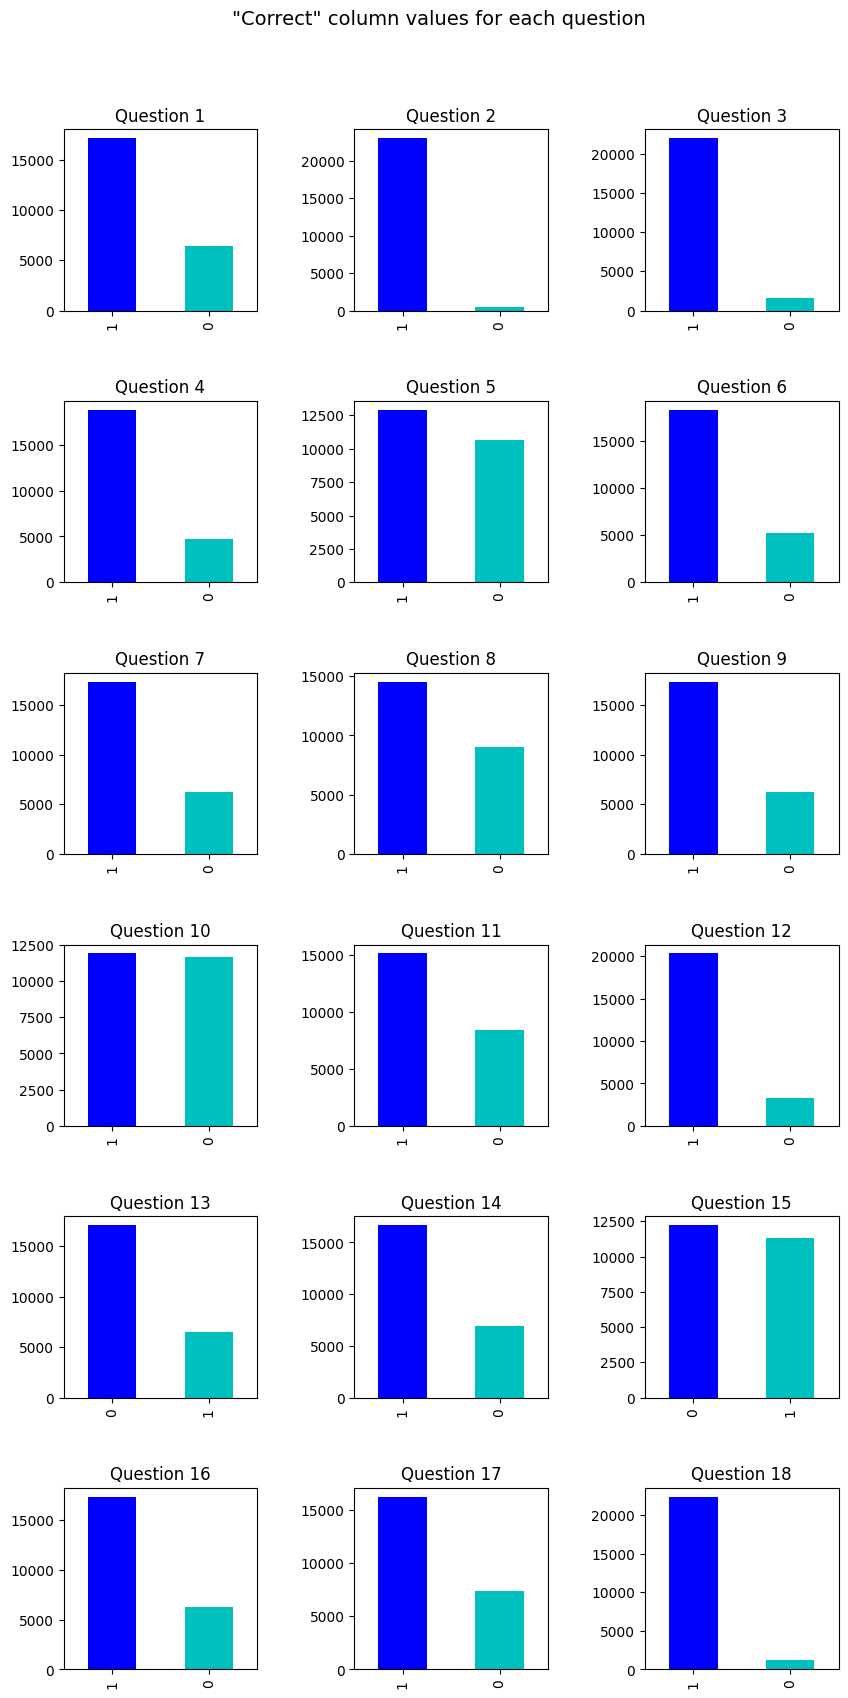

In [13]:
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("\"Correct\" column values for each question", fontsize=14, y=0.94)

for n in range(1,19):
    ax = plt.subplot(6, 3, n)

    plot_df = labels.loc[labels.q == n]
    plot_df = plot_df.correct.value_counts()
    plot_df.plot(kind="bar", color=['b', 'c'])

    ax.set_title("Question " + str(n))
    ax.set_xlabel("")

# Data Preparation

The dataset organizes level interactions into segments defined by the `level_group` column (0–4, 5–12, 13–22).  
Our goal is to predict whether the user answered each question in these level groups correctly.

To support feature engineering, we first create two lists: one containing the names of the categorical columns and the other for numerical columns. These will guide the construction of aggregate features.

In [119]:
CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid','fullscreen','hq','music']
NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

We group the data by `session_id` and `level_group`.  
For categorical columns, we count the number of distinct values in each group.  
For numerical columns, we calculate the mean and standard deviation within each group.  
All resulting dataframes are then concatenated to build the final feature-engineered dataset.


In [120]:
def feature_engineer(dataset_df):
    dfs = []
    for c in CATEGORICAL:
        tmp = dataset_df.groupby(['session_id','level_group'], observed=True)[c].agg('nunique')
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id','level_group'], observed=True)[c].agg('mean')
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id','level_group'], observed=True)[c].agg('std')
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    dataset_df = pd.concat(dfs,axis=1)
    dataset_df = dataset_df.fillna(-1)
    dataset_df = dataset_df.reset_index()
    dataset_df = dataset_df.set_index('session_id')
    return dataset_df


In [121]:
print(dataset_df.columns.tolist())
dataset_df = feature_engineer(dataset_df)

print("Full prepared dataset shape is {}".format(dataset_df.shape))

['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level', 'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid', 'fullscreen', 'hq', 'music', 'level_group']
Full prepared dataset shape is (70686, 25)


In [79]:
# Display the first 5 examples
dataset_df.head(5)

,level_group,event_name_nunique,name_nunique,fqid_nunique,text_fqid_nunique,elapsed_time,level,page,room_coor_x,room_coor_y,...,screen_coor_y,hover_duration,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,17,8.579356e+04,1.945455,-1.0,7.701275,-71.413750,...,383.044861,2389.500000,49246.539458,1.230975,-1.000000,399.296051,129.292404,214.871002,104.082741,3227.370757
20090312431273200,13-22,10,3,49,35,1.040601e+06,17.402381,-1.0,-130.347168,-162.004303,...,379.301025,899.925903,126666.129584,2.358652,-1.000000,622.061401,230.370880,240.280212,99.067863,1305.088265
20090312431273200,5-12,10,3,39,24,3.572052e+05,8.054054,-1.0,14.306062,-57.269321,...,378.784912,969.333313,80175.676658,2.096919,-1.000000,357.227692,137.409470,203.268555,120.255455,1316.408315
20090312433251036,0-4,11,4,22,11,9.763342e+04,1.870504,0.0,-84.045959,-53.671082,...,370.723083,1378.750000,67372.714092,1.232616,0.000000,445.980042,156.186249,252.554703,121.062927,2114.876406
20090312433251036,13-22,11,6,73,43,2.498852e+06,17.762529,5.1,-30.762283,-142.861893,...,387.930084,720.384949,777382.529186,1.825923,0.863075,529.575684,234.279587,259.288849,133.345688,1990.705518


Let us plot some numerical columns and their value against each level_group:

/tmp/ipykernel_6242/249453236.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, data in dataset_df.groupby('level_group'):


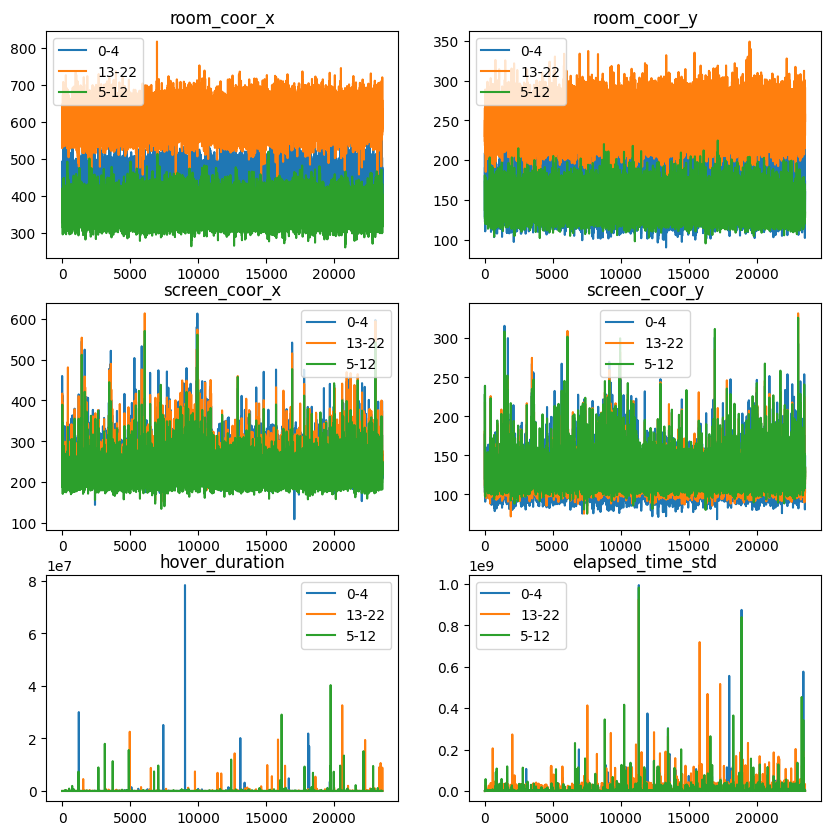

In [100]:
figure, axis = plt.subplots(3, 2, figsize=(10, 10))

for name, data in dataset_df.groupby('level_group'):
    axis[0, 0].plot(range(1, len(data['room_coor_x_std'])+1), data['room_coor_x_std'], label=name)
    axis[0, 1].plot(range(1, len(data['room_coor_y_std'])+1), data['room_coor_y_std'], label=name)
    axis[1, 0].plot(range(1, len(data['screen_coor_x_std'])+1), data['screen_coor_x_std'], label=name)
    axis[1, 1].plot(range(1, len(data['screen_coor_y_std'])+1), data['screen_coor_y_std'], label=name)
    axis[2, 0].plot(range(1, len(data['hover_duration'])+1), data['hover_duration_std'], label=name)
    axis[2, 1].plot(range(1, len(data['elapsed_time_std'])+1), data['elapsed_time_std'], label=name)
    

axis[0, 0].set_title('room_coor_x')
axis[0, 1].set_title('room_coor_y')
axis[1, 0].set_title('screen_coor_x')
axis[1, 1].set_title('screen_coor_y')
axis[2, 0].set_title('hover_duration')
axis[2, 1].set_title('elapsed_time_std')

for i in range(3):
    axis[i, 0].legend()
    axis[i, 1].legend()

plt.show()

Now let us split the dataset into training and testing datasets

In [101]:
def split_dataset(dataset, test_ratio=0.20):
    USER_LIST = dataset.index.unique()
    split = int(len(USER_LIST) * (1 - 0.20))
    return dataset.loc[USER_LIST[:split]], dataset.loc[USER_LIST[split:]]

train_x, valid_x = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_x), len(valid_x)))

56547 examples in training, 14139 examples in testing.


# Select Model
We will import all tree-based models from the tensorflow library.


In [102]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

We configure the model to use a predefined set of hyperparameters recommended by TensorFlow Decision Forests for strong performance on general benchmarks.
This acts as an optimized configuration preset.

In [103]:
rf = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1")

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpin7a9daz as temporary training directory


W0000 00:00:1750726623.021229    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726623.021249    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726623.021252    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


## Training
A model will be trained for each question in order to know if it will be answered correctly by a user. Data structures will be created to store the trained models, the predictions on the validation set and the evaluation scores of the trained models.

In [104]:
#Fetch the unique list of user sessions in the validation dataset
VALID_USER_LIST = valid_x.index.unique()

# Create a dataframe for storing the predictions of each question for all users
# in the validation set.
prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=VALID_USER_LIST)

# Create an empty dictionary to store the models created for each question.
models = {}

# Create an empty dictionary to store the evaluation score for each question.
evaluation_dict ={}

### Understanding the Relationship Between Level Groups and Questions

Before training, it's important to understand the relationship between level groups and the quiz questions.

In the game, each set of levels (`level_group`) is followed by a checkpoint consisting of one or more questions. Specifically:

- Questions 1–3 evaluate performance on levels 0–4 (`level_group` 0–4)
- Questions 4–13 correspond to `level_group` 5–12
- Questions 14–18 correspond to `level_group` 13–22

Therefore, to train a model for a given question, we use only the session data from its corresponding level group. 

A separate model is trained for each question and stored in the `models` dictionary.


In [106]:


# Iterate through questions 1 to 18 to train models for each question, evaluate
# the trained model and store the predicted values.
for q_no in range(1,19):

    # Select level group for the question based on the q_no.
    if q_no<=3: grp = '0-4'
    elif q_no<=13: grp = '5-12'
    elif q_no<=22: grp = '13-22'
    print("### q_no", q_no, "grp", grp)
    
        
    # Filter the rows in the datasets based on the selected level group. 
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    valid_df = valid_x.loc[valid_x.level_group == grp]
    valid_users = valid_df.index.values

    # Select the labels for the related q_no.
    train_labels = labels.loc[labels.q==q_no].set_index('session').loc[train_users]
    valid_labels = labels.loc[labels.q==q_no].set_index('session').loc[valid_users]

    # Add the label to the filtered datasets.
    train_df = train_df.copy()
    valid_df = valid_df.copy()
    train_df["correct"] = train_labels["correct"]
    valid_df["correct"] = valid_labels["correct"]

    # There's one more step required before we can train the model. 
    # We need to convert the datatset from Pandas format (pd.DataFrame)
    # into TensorFlow Datasets format (tf.data.Dataset).
    # TensorFlow Datasets is a high performance data loading library 
    # which is helpful when training neural networks with accelerators like GPUs and TPUs.
    # We are omitting `level_group`, since it is not needed for training anymore.
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df.loc[:, train_df.columns != 'level_group'], label="correct")
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df.loc[:, valid_df.columns != 'level_group'], label="correct")

    # We will now create the Gradient Boosted Trees Model with default settings. 
    # By default the model is set to train for a classification task.
    gbtm = tfdf.keras.GradientBoostedTreesModel(verbose=0)
    gbtm.compile(metrics=["accuracy"])

    # Train the model.
    gbtm.fit(x=train_ds)

    # Store the model
    models[f'{grp}_{q_no}'] = gbtm

    # Evaluate the trained model on the validation dataset and store the 
    # evaluation accuracy in the `evaluation_dict`.
    inspector = gbtm.make_inspector()
    inspector.evaluation()
    evaluation = gbtm.evaluate(x=valid_ds,return_dict=True)
    evaluation_dict[q_no] = evaluation["accuracy"]         

    # Use the trained model to make predictions on the validation dataset and 
    # store the predicted values in the `prediction_df` dataframe.
    predict = gbtm.predict(x=valid_ds)
    prediction_df.loc[valid_users, q_no-1] = predict.flatten()   

### q_no 1 grp 0-4


W0000 00:00:1750726663.519599    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726663.519617    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726663.519619    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726663.764325    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726663.764345    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726663.764352    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


1/5 [=====>........................] - ETA: 0s

I0000 00:00:1750726664.181727  170878 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.10529
I0000 00:00:1750726664.181754  170878 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 75
I0000 00:00:1750726664.184154  170878 gradient_boosted_trees.cc:279] Truncates the model to 46 tree(s) i.e. 46  iteration(s).
I0000 00:00:1750726664.184291  170878 gradient_boosted_trees.cc:341] Final model num-trees:46 valid-loss:1.105292 valid-accuracy:0.738262
I0000 00:00:1750726664.184883  170878 kernel.cc:926] Export model in log directory: /tmp/tmpumr8kbh2 with prefix d17b5d08e8c240a9
I0000 00:00:1750726664.185965  170878 kernel.cc:944] Save model in resources
I0000 00:00:1750726664.186969    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.10529

Accuracy: 0.738262  CI95[W][0 1]
ErrorRate: : 0.261738


Confusion Table:
truth\

5/5 [==============================] - 0s 5ms/step
### q_no 2 grp 0-4


W0000 00:00:1750726664.441153    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726664.441170    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726664.441172    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726664.672329    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726664.672351    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726664.672357    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9748


I0000 00:00:1750726664.888545  172297 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 0.190329
I0000 00:00:1750726664.888573  172297 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 40
I0000 00:00:1750726664.890283  172297 gradient_boosted_trees.cc:279] Truncates the model to 11 tree(s) i.e. 11  iteration(s).
W0000 00:00:1750726664.890535  172297 gradient_boosted_trees.cc:299] The best validation loss was obtained during iteration 10. This is the first step during which a validation loss was computed, hence the validation loss might still have been unstable and not optimal. Following are examples of hyper-parameter changes that might help with the situation. Try them in order: (1) Decrease the 'shrinkage rate' parameter (default value of 0.1). For example divide its value by 2. (2) Decrease the 'num_candidate_attributes_ratio' hyper-parameter (default value of 1) by 80%. (3) Increase

5/5 [==============================] - 0s 4ms/step
### q_no 3 grp 0-4


W0000 00:00:1750726665.154599    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726665.154618    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726665.154619    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726665.376436    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726665.376455    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726665.376460    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9351


I0000 00:00:1750726665.639846  173099 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 0.483527
I0000 00:00:1750726665.639869  173099 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 48
I0000 00:00:1750726665.641369  173099 gradient_boosted_trees.cc:279] Truncates the model to 19 tree(s) i.e. 19  iteration(s).
I0000 00:00:1750726665.641492  173099 gradient_boosted_trees.cc:341] Final model num-trees:19 valid-loss:0.483527 valid-accuracy:0.931462
I0000 00:00:1750726665.641782  173099 kernel.cc:926] Export model in log directory: /tmp/tmptdt9vv07 with prefix c5859ba6b33540ae
I0000 00:00:1750726665.642299  173099 kernel.cc:944] Save model in resources
I0000 00:00:1750726665.643177    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 0.483527

Accuracy: 0.931462  CI95[W][0 1]
ErrorRate: : 0.0685375


Confusion Table:
tru

5/5 [==============================] - 0s 4ms/step
### q_no 4 grp 5-12


W0000 00:00:1750726665.903552    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726665.903569    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726665.903571    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726666.121813    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726666.121832    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726666.121838    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


1/5 [=====>........................] - ETA: 0s

I0000 00:00:1750726666.539290  174075 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 0.94444
I0000 00:00:1750726666.539317  174075 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 75
I0000 00:00:1750726666.541261  174075 gradient_boosted_trees.cc:279] Truncates the model to 46 tree(s) i.e. 46  iteration(s).
I0000 00:00:1750726666.541372  174075 gradient_boosted_trees.cc:341] Final model num-trees:46 valid-loss:0.944440 valid-accuracy:0.794387
I0000 00:00:1750726666.541871  174075 kernel.cc:926] Export model in log directory: /tmp/tmpsoljbz57 with prefix 15c013cbf9c04868
I0000 00:00:1750726666.542960  174075 kernel.cc:944] Save model in resources
I0000 00:00:1750726666.543946    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 0.94444

Accuracy: 0.794387  CI95[W][0 1]
ErrorRate: : 0.205613


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 5 grp 5-12


W0000 00:00:1750726666.784737    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726666.784755    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726666.784756    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726667.009154    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726667.009172    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726667.009178    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6281


I0000 00:00:1750726667.418622  175435 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.30149
I0000 00:00:1750726667.418649  175435 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 72
I0000 00:00:1750726667.421064  175435 gradient_boosted_trees.cc:279] Truncates the model to 43 tree(s) i.e. 43  iteration(s).
I0000 00:00:1750726667.421200  175435 gradient_boosted_trees.cc:341] Final model num-trees:43 valid-loss:1.301490 valid-accuracy:0.618996
I0000 00:00:1750726667.421705  175435 kernel.cc:926] Export model in log directory: /tmp/tmp5saqvyfu with prefix 7f5386d7248349d8
I0000 00:00:1750726667.422657  175435 kernel.cc:944] Save model in resources
I0000 00:00:1750726667.423591    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.30149

Accuracy: 0.618996  CI95[W][0 1]
ErrorRate: : 0.381004


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 6 grp 5-12


W0000 00:00:1750726667.694349    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726667.694367    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726667.694368    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726667.932083    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726667.932120    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726667.932129    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


1/5 [=====>........................] - ETA: 0s

I0000 00:00:1750726668.276681  176746 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.00211
I0000 00:00:1750726668.276711  176746 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 58
I0000 00:00:1750726668.278480  176746 gradient_boosted_trees.cc:279] Truncates the model to 29 tree(s) i.e. 29  iteration(s).
I0000 00:00:1750726668.278600  176746 gradient_boosted_trees.cc:341] Final model num-trees:29 valid-loss:1.002108 valid-accuracy:0.776039
I0000 00:00:1750726668.279000  176746 kernel.cc:926] Export model in log directory: /tmp/tmps17_yf40 with prefix 98ee794ac92d4b1a
I0000 00:00:1750726668.279727  176746 kernel.cc:944] Save model in resources
I0000 00:00:1750726668.280697    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.00211

Accuracy: 0.776039  CI95[W][0 1]
ErrorRate: : 0.223961


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 7 grp 5-12


W0000 00:00:1750726668.533083    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726668.533100    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726668.533101    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726668.754773    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726668.754792    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726668.754798    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7458


I0000 00:00:1750726669.033067  177834 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.10822
I0000 00:00:1750726669.033092  177834 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 45
I0000 00:00:1750726669.034784  177834 gradient_boosted_trees.cc:279] Truncates the model to 16 tree(s) i.e. 16  iteration(s).
I0000 00:00:1750726669.034935  177834 gradient_boosted_trees.cc:341] Final model num-trees:16 valid-loss:1.108216 valid-accuracy:0.739881
I0000 00:00:1750726669.035235  177834 kernel.cc:926] Export model in log directory: /tmp/tmpj_t5jhpn with prefix f02c6b18e62f4b4a
I0000 00:00:1750726669.035753  177834 kernel.cc:944] Save model in resources
I0000 00:00:1750726669.036956    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.10822

Accuracy: 0.739881  CI95[W][0 1]
ErrorRate: : 0.260119


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 8 grp 5-12


W0000 00:00:1750726669.290221    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726669.290237    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726669.290239    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726669.520006    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726669.520025    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726669.520030    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


1/5 [=====>........................] - ETA: 0s

I0000 00:00:1750726669.794517  178714 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.31734
I0000 00:00:1750726669.794543  178714 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 49
I0000 00:00:1750726669.795812  178714 gradient_boosted_trees.cc:279] Truncates the model to 20 tree(s) i.e. 20  iteration(s).
I0000 00:00:1750726669.795937  178714 gradient_boosted_trees.cc:341] Final model num-trees:20 valid-loss:1.317335 valid-accuracy:0.613060
I0000 00:00:1750726669.796265  178714 kernel.cc:926] Export model in log directory: /tmp/tmp37t3aj3l with prefix 3aae178691f4407e
I0000 00:00:1750726669.796963  178714 kernel.cc:944] Save model in resources
I0000 00:00:1750726669.797933    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.31734

Accuracy: 0.61306  CI95[W][0 1]
ErrorRate: : 0.38694


Confusion Table:
truth\pr

5/5 [==============================] - 0s 4ms/step
### q_no 9 grp 5-12


W0000 00:00:1750726670.049876    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726670.049893    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726670.049895    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726670.269298    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726670.269317    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726670.269323    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 4ms/step
### q_no 10 grp 5-12


W0000 00:00:1750726671.414551    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726671.414577    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726671.414579    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726671.650658    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726671.650682    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726671.650690    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6049


I0000 00:00:1750726672.052219  180970 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.31166
I0000 00:00:1750726672.052248  180970 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 71
I0000 00:00:1750726672.054187  180970 gradient_boosted_trees.cc:279] Truncates the model to 42 tree(s) i.e. 42  iteration(s).
I0000 00:00:1750726672.054297  180970 gradient_boosted_trees.cc:341] Final model num-trees:42 valid-loss:1.311664 valid-accuracy:0.614679
I0000 00:00:1750726672.054773  180970 kernel.cc:926] Export model in log directory: /tmp/tmp338tnu2k with prefix 8094d3b3537f45bd
I0000 00:00:1750726672.055674  180970 kernel.cc:944] Save model in resources
I0000 00:00:1750726672.056766    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.31166

Accuracy: 0.614679  CI95[W][0 1]
ErrorRate: : 0.385321


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 11 grp 5-12


W0000 00:00:1750726672.311610    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726672.311638    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726672.311641    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726672.544284    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726672.544308    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726672.544317    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6531


I0000 00:00:1750726672.816822  182265 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.29814
I0000 00:00:1750726672.816843  182265 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 47
I0000 00:00:1750726672.818099  182265 gradient_boosted_trees.cc:279] Truncates the model to 18 tree(s) i.e. 18  iteration(s).
I0000 00:00:1750726672.818221  182265 gradient_boosted_trees.cc:341] Final model num-trees:18 valid-loss:1.298145 valid-accuracy:0.626012
I0000 00:00:1750726672.818515  182265 kernel.cc:926] Export model in log directory: /tmp/tmpifrziq3k with prefix d1f195f1041a4a5b
I0000 00:00:1750726672.819050  182265 kernel.cc:944] Save model in resources
I0000 00:00:1750726672.820049    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.29814

Accuracy: 0.626012  CI95[W][0 1]
ErrorRate: : 0.373988


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 12 grp 5-12


W0000 00:00:1750726673.085934    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726673.085962    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726673.085964    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726673.311032    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726673.311055    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726673.311064    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


1/5 [=====>........................] - ETA: 0s

I0000 00:00:1750726673.592656  183177 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 0.811303
I0000 00:00:1750726673.592679  183177 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 51
I0000 00:00:1750726673.594168  183177 gradient_boosted_trees.cc:279] Truncates the model to 22 tree(s) i.e. 22  iteration(s).
I0000 00:00:1750726673.594282  183177 gradient_boosted_trees.cc:341] Final model num-trees:22 valid-loss:0.811303 valid-accuracy:0.853751
I0000 00:00:1750726673.594611  183177 kernel.cc:926] Export model in log directory: /tmp/tmpgrx12zxb with prefix b4d333a2e600494a
I0000 00:00:1750726673.595207  183177 kernel.cc:944] Save model in resources
I0000 00:00:1750726673.596273    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 0.811303

Accuracy: 0.853751  CI95[W][0 1]
ErrorRate: : 0.146249


Confusion Table:
trut

5/5 [==============================] - 0s 4ms/step
### q_no 13 grp 5-12


W0000 00:00:1750726673.841843    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726673.841870    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726673.841872    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726674.065729    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726674.065750    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726674.065757    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7216


I0000 00:00:1750726674.406853  184153 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.10186
I0000 00:00:1750726674.406877  184153 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 60
I0000 00:00:1750726674.408359  184153 gradient_boosted_trees.cc:279] Truncates the model to 31 tree(s) i.e. 31  iteration(s).
I0000 00:00:1750726674.408478  184153 gradient_boosted_trees.cc:341] Final model num-trees:31 valid-loss:1.101861 valid-accuracy:0.731247
I0000 00:00:1750726674.408861  184153 kernel.cc:926] Export model in log directory: /tmp/tmpv4j7btky with prefix b126c2c92dc5462f
I0000 00:00:1750726674.409594  184153 kernel.cc:944] Save model in resources
I0000 00:00:1750726674.410596    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.10186

Accuracy: 0.731247  CI95[W][0 1]
ErrorRate: : 0.268753


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 14 grp 13-22


W0000 00:00:1750726674.661680    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726674.661706    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726674.661708    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726674.901080    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726674.901112    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726674.901122    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7337


I0000 00:00:1750726675.337593  185305 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.15027
I0000 00:00:1750726675.337616  185305 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 75
I0000 00:00:1750726675.340135  185305 gradient_boosted_trees.cc:279] Truncates the model to 46 tree(s) i.e. 46  iteration(s).
I0000 00:00:1750726675.340294  185305 gradient_boosted_trees.cc:341] Final model num-trees:46 valid-loss:1.150266 valid-accuracy:0.711279
I0000 00:00:1750726675.341033  185305 kernel.cc:926] Export model in log directory: /tmp/tmpzyyus661 with prefix fab58ab01eea47a0
I0000 00:00:1750726675.342333  185305 kernel.cc:944] Save model in resources
I0000 00:00:1750726675.343728    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.15027

Accuracy: 0.711279  CI95[W][0 1]
ErrorRate: : 0.288721


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 15 grp 13-22


W0000 00:00:1750726675.610344    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726675.610370    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726675.610373    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726675.842151    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726675.842176    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726675.842184    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5990


I0000 00:00:1750726676.203187  186713 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.32172
I0000 00:00:1750726676.203211  186713 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 58
I0000 00:00:1750726676.204985  186713 gradient_boosted_trees.cc:279] Truncates the model to 29 tree(s) i.e. 29  iteration(s).
I0000 00:00:1750726676.205116  186713 gradient_boosted_trees.cc:341] Final model num-trees:29 valid-loss:1.321716 valid-accuracy:0.608203
I0000 00:00:1750726676.205516  186713 kernel.cc:926] Export model in log directory: /tmp/tmp2exkz2yq with prefix a735452389534861
I0000 00:00:1750726676.206250  186713 kernel.cc:944] Save model in resources
I0000 00:00:1750726676.207287    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.32172

Accuracy: 0.608203  CI95[W][0 1]
ErrorRate: : 0.391797


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 16 grp 13-22


W0000 00:00:1750726676.485601    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726676.485623    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726676.485625    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726676.727707    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726676.727733    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726676.727739    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


1/5 [=====>........................] - ETA: 0s

I0000 00:00:1750726676.958456  187802 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.14057
I0000 00:00:1750726676.958479  187802 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 41
I0000 00:00:1750726676.959615  187802 gradient_boosted_trees.cc:279] Truncates the model to 12 tree(s) i.e. 12  iteration(s).
I0000 00:00:1750726676.959746  187802 gradient_boosted_trees.cc:341] Final model num-trees:12 valid-loss:1.140571 valid-accuracy:0.741500
I0000 00:00:1750726676.959996  187802 kernel.cc:926] Export model in log directory: /tmp/tmpz9zpxhki with prefix 77c7d348d8c44983
I0000 00:00:1750726676.960406  187802 kernel.cc:944] Save model in resources
I0000 00:00:1750726676.961431    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.14057

Accuracy: 0.7415  CI95[W][0 1]
ErrorRate: : 0.2585


Confusion Table:
truth\pred

5/5 [==============================] - 0s 4ms/step
### q_no 17 grp 13-22


W0000 00:00:1750726677.209894    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726677.209919    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726677.209921    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726677.432871    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726677.432897    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726677.432906    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


1/5 [=====>........................] - ETA: 0s

I0000 00:00:1750726677.709897  188618 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 1.20502
I0000 00:00:1750726677.709917  188618 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 49
I0000 00:00:1750726677.711125  188618 gradient_boosted_trees.cc:279] Truncates the model to 20 tree(s) i.e. 20  iteration(s).
I0000 00:00:1750726677.711237  188618 gradient_boosted_trees.cc:341] Final model num-trees:20 valid-loss:1.205024 valid-accuracy:0.694549
I0000 00:00:1750726677.711549  188618 kernel.cc:926] Export model in log directory: /tmp/tmpj2jk1c07 with prefix c941d72666774754
I0000 00:00:1750726677.712088  188618 kernel.cc:944] Save model in resources
I0000 00:00:1750726677.713066    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 1.20502

Accuracy: 0.694549  CI95[W][0 1]
ErrorRate: : 0.305451


Confusion Table:
truth\

5/5 [==============================] - 0s 4ms/step
### q_no 18 grp 13-22


W0000 00:00:1750726677.960601    6242 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726677.960623    6242 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1750726677.960625    6242 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
I0000 00:00:1750726678.184941    6242 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750726678.184965    6242 kernel.cc:783] Collect training examples
I0000 00:00:1750726678.184973    6242 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false


5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9512


I0000 00:00:1750726678.832778  189561 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 0.347324
I0000 00:00:1750726678.832804  189561 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 126
I0000 00:00:1750726678.836385  189561 gradient_boosted_trees.cc:279] Truncates the model to 97 tree(s) i.e. 97  iteration(s).
I0000 00:00:1750726678.836508  189561 gradient_boosted_trees.cc:341] Final model num-trees:97 valid-loss:0.347324 valid-accuracy:0.955208
I0000 00:00:1750726678.837272  189561 kernel.cc:926] Export model in log directory: /tmp/tmp9lru3rfv with prefix 69c4b214416143bd
I0000 00:00:1750726678.838828  189561 kernel.cc:944] Save model in resources
I0000 00:00:1750726678.840024    6242 abstract_model.cc:921] Model self evaluation:
Task: CLASSIFICATION
Label: __LABEL
Loss (BINOMIAL_LOG_LIKELIHOOD): 0.347324

Accuracy: 0.955208  CI95[W][0 1]
ErrorRate: : 0.0447922


Confusion Table:
tr

5/5 [==============================] - 0s 4ms/step


## Visualize the model

In [107]:
%matplotlib inline


In [117]:
tfdf.model_plotter.plot_model_in_colab(models['0-4_1'], tree_idx=0)

### Inspecting Variable Importance

Variable importance provides insight into how much each feature contributes to the model's predictions or overall performance.

TensorFlow Decision Forests offers multiple ways to measure feature importance.

We will select one of the trained models from the `models` dictionary and explore the available variable importance metrics.

In [109]:
inspector = models['0-4_1'].make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


As an example, let us display the important features for the Variable Importance NUM_AS_ROOT.

The larger the importance score for NUM_AS_ROOT, the more impact it has on the outcome of the model for Question 1(i.e., model["0-4_1"]).


In [112]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

[("text_fqid_nunique" (1; #20), 8.0),
 ("name_nunique" (1; #9), 7.0),
 ("level" (1; #7), 4.0),
 ("page" (1; #10), 4.0),
 ("page_std" (1; #11), 4.0),
 ("elapsed_time" (1; #1), 3.0),
 ("event_name_nunique" (1; #3), 3.0),
 ("hover_duration_std" (1; #6), 3.0),
 ("screen_coor_x_std" (1; #17), 3.0),
 ("room_coor_x" (1; #12), 2.0),
 ("elapsed_time_std" (1; #2), 1.0),
 ("room_coor_x_std" (1; #13), 1.0),
 ("room_coor_y_std" (1; #15), 1.0),
 ("screen_coor_x" (1; #16), 1.0),
 ("screen_coor_y_std" (1; #19), 1.0)]

In [113]:
for name, value in evaluation_dict.items():
  print(f"question {name}: accuracy {value:.4f}")

print("\nAverage accuracy", sum(evaluation_dict.values())/18)

question 1: accuracy 0.7282
question 2: accuracy 0.9748
question 3: accuracy 0.9351
question 4: accuracy 0.7927
question 5: accuracy 0.6281
question 6: accuracy 0.7889
question 7: accuracy 0.7458
question 8: accuracy 0.6323
question 9: accuracy 0.7655
question 10: accuracy 0.6049
question 11: accuracy 0.6531
question 12: accuracy 0.8695
question 13: accuracy 0.7216
question 14: accuracy 0.7337
question 15: accuracy 0.5990
question 16: accuracy 0.7488
question 17: accuracy 0.7038
question 18: accuracy 0.9512

Average accuracy 0.7542730470498403
